# Train the contender on self-play episodes of the champion

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from alphazero.mcts import MCTS
from alphazero.coach import Coach
from alphazero.gomoku_game import GomokuGame as Gomoku, initial_stones
from alphazero.interfaces import TrainParams
from domoku.policies.heuristic_policy import HeuristicPolicy
from alphazero.gomoku_board import GomokuBoard
from domoku import tools as gt

In [4]:
BOARD_SIZE = 15

In [5]:
detector = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
game = Gomoku(BOARD_SIZE, detector=detector, initial=initial_stones(BOARD_SIZE, 4))

2022-07-15 23:10:07.202191: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 23:10:07.202884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 23:10:07.208478: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 23:10:07.209184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 23:10:07.210122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from S

----

In [6]:
policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
mcts = MCTS(game, policy, cpuct=1.0, num_simulations=100, model_threshold=.4)

In [7]:
board = game.get_initial_board()  # random start positions, sometimes unfair, but so what?
print(board)
import numpy as np

# Two mood versions of the champion playing against each other = less draws
# These settings may change over the training period, once opponents get stronger.
temperatures = [0.6, 0]  # more tight vs more explorative

episode_step = 0
train_examples = []
done = policy.get_winner(board.canonical_representation())
while done is None and episode_step < 30:
    episode_step += 1
    t = temperatures[episode_step % 2]
    pi = mcts.get_action_prob(board, temperature=t)
    action = np.random.choice(len(pi), p=pi)
    board.act(action)
    print(board)
    done = policy.get_winner(board.canonical_representation())

# The player who made the last move, is the winner.
print (f"The winner is {1-board.get_current_player()}")
board.plot()

J7 J9 F7 K11 (Black next)


2022-07-15 23:10:15.271338: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
2022-07-15 23:10:15.471490: W tensorflow/stream_executor/gpu/asm_compiler.cc:111] *** WARNING *** You are using ptxas 10.1.243, which is older than 11.1. ptxas before 11.1 is known to miscompile XLA code, leading to incorrect results or invalid-address errors.

You may not need to update to CUDA 11.1; cherry-picking the ptxas binary is often sufficient.


J7 J9 F7 K11 J11 (White next)
J7 J9 F7 K11 J11 F10 (Black next)
J7 J9 F7 K11 J11 F10 H5 (White next)
J7 J9 F7 K11 J11 F10 H5 G6 (Black next)
... J9 F7 K11 J11 F10 H5 G6 I6 (White next)
... F7 K11 J11 F10 H5 G6 I6 K8 (Black next)
... K11 J11 F10 H5 G6 I6 K8 H7 (White next)
... J11 F10 H5 G6 I6 K8 H7 I10 (Black next)
... F10 H5 G6 I6 K8 H7 I10 H11 (White next)
... H5 G6 I6 K8 H7 I10 H11 G7 (Black next)
... G6 I6 K8 H7 I10 H11 G7 G8 (White next)
... I6 K8 H7 I10 H11 G7 G8 F9 (Black next)
... K8 H7 I10 H11 G7 G8 F9 H6 (White next)
... H7 I10 H11 G7 G8 F9 H6 H8 (Black next)
... I10 H11 G7 G8 F9 H6 H8 J5 (White next)
... H11 G7 G8 F9 H6 H8 J5 K4 (Black next)
... G7 G8 F9 H6 H8 J5 K4 D5 (White next)
... G8 F9 H6 H8 J5 K4 D5 E6 (Black next)
... F9 H6 H8 J5 K4 D5 E6 I5 (White next)
... H6 H8 J5 K4 D5 E6 I5 K5 (Black next)
... H8 J5 K4 D5 E6 I5 K5 G5 (White next)
... J5 K4 D5 E6 I5 K5 G5 F5 (Black next)
... K4 D5 E6 I5 K5 G5 F5 I7 (White next)
... D5 E6 I5 K5 G5 F5 I7 L7 (Black next)
... E6 I5 K

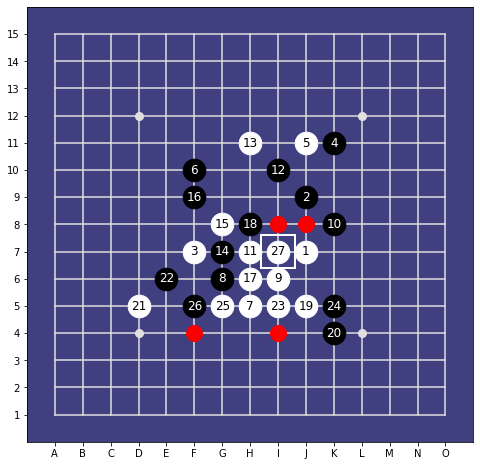

In [8]:
from copy import deepcopy
from domoku.board import GomokuBoard as LegacyBoard
board = deepcopy(board)
stones = board.stones[:-6]
stones = "".join([str(stone) for stone in stones])
board_t = LegacyBoard(n=BOARD_SIZE, disp_width=8, stones=stones, heuristics=policy)
board_t.display()

---

### For reference: The policy's opinion about that board state

In [9]:
board = GomokuBoard(BOARD_SIZE, stones)
pi, v = policy(board.canonical_representation())
print((np.array(pi)*1000).astype(int))
print(f"Value: {v}")

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0]
 [  0   0   0   0   0  12   0   0   0   0   0   0   4   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   4   0   0  16  16   0   4  16   4   0   0   0]
 [  0   0   0   0   0   0   0   8   4   0  12   4   4   0   0]
 [  0   0  12   0   4   0   0   0 141 141   0   4   3   0   0]
 [  0   0   0  12   8   0   0   0   0   0  12  20   0   4   0]
 [  0   0   7   0   0  16   0   0   0  12  16   0  12   0   0]
 [  0   0   0   0  12   0   0   0   0   0   0   8   0   0   0]
 [  0   0   0   0   7 141  20  12 145   8   0   0   0   0   0]
 [  0   0   0   0   4   8   4  24   4   4  12   0   0   0   0]
 [  0   0   0   0   0   3   4   0   0   3  12   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
Value: -0.1710540212372656


---

### The search tree has a similar yet more ascertive opinion
The action counts will inform the next policy and the $max(Q_a)$ may inform the value function.

In most cases, the softmax will agree with the move actually taken, only if the chances are somewhat equally distributed, will the softmax also allow for a choice.

In [10]:
key = board.get_string_representation()
probs = mcts.compute_probs(board, temperature=1.0)
probs = np.array(probs).reshape([BOARD_SIZE, BOARD_SIZE])
print((probs*100).astype(int))
q_advice = [mcts.Q.get((key, i), -float('inf')) for i in range(225)]
print()
print(f"Value from max(Q): {np.max(q_advice)}")

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  0  0  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  2  0  0  0  0 10  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  2  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Value from max(Q): -0.8612364973877449


# Symmetries

In [11]:
math_rep = board.canonical_representation()
symmetries = game.get_symmetries(math_rep, probs)
symmetries[0][0].shape

(17, 17, 3)

We see the board diagonally flipped

In [12]:
gt.print_channels(symmetries[0][0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 3]
 [3 0 0 0 0 2 0 2 0 1 0 2 0 0 0 0 3]
 [3 0 0 0 0 2 2 2 0 0 1 0 0 0 0 0 3]
 [3 0 0 0 0 2 2 2 1 0 0 2 0 0 0 0 3]
 [3 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 1 0 2 0 1 1 0 0 0 0 0 3]
 [3 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


In [13]:
for i in range(1):
    print((np.array(symmetries[i][1]).reshape(15, 15) * 100).astype(int))
    print()

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 45  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  7  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]



---

# The Coach creates the trajectories and saves them

Would be nice to see the training converge (and overfit) with a single episode in its 8 symmetries, and validate the overfitted against a board with all stones shifted. We'd expect only minor differences due to the different border influence, but otherwise the conv-only network naturally features translation symmetry.

In [14]:
detector = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
game = Gomoku(BOARD_SIZE, detector=detector, initial=initial_stones(BOARD_SIZE, 4))

/home/wgiersche/.local/share/virtualenvs/DeepGomoku-yQC4gx5q/lib/python3.8/site-packages/numpy/core/fromnumeric.py:2007: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [15]:
params = TrainParams(
    epochs_per_train=400,
    update_threshold=0.6,
    max_queue_length=8192,    # Number of game examples to keep to train the neural networks.
    num_simulations=400,
    arena_compare=2,         # Number of games to play during arena play to evaluate new network.
    cpuct=1.0,
    checkpoint_dir='./test_data/',
    load_model=False,
    load_folder_file=('/dev/models/8x100x50', 'best.pth.tar'),
    num_iters_for_train_examples_history=4,
    num_iterations=2,
    num_episodes=2,
    temperature_threshold=12
)
coach = Coach(game, params=params)

In [16]:
policy = HeuristicPolicy(BOARD_SIZE, cut_off=.1)
mcts = MCTS(game, policy, cpuct=1.0, num_simulations=100, model_threshold=.4)
examples = coach.create_trajectories(mcts, 1, shuffle=False)

   Self Play: 100%|██████████| 2/2 [01:56<00:00, 58.09s/it]


In [17]:
len(examples)

240

In [19]:
!ls -ltr test_data
!pwd

total 2644
-rw-rw-r-- 1 wgiersche wgiersche 2703619 Jul 15 23:21 checkpoint_0.pth.tar.examples
/home/wgiersche/workspace/Project-Ellie/DeepGomoku/notebooks


In [20]:
import numpy as np
ex = examples[-25]
print(len(ex), ex[0].shape, ex[2])
print((np.array(ex[1])*100).reshape((15, 15)).astype(int))

3 (17, 17, 3) -0.9933818201238935
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 90  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


---
# Files containing the training records

In [30]:
examples_file = 'temp/checkpoint_0.pth.tar.examples'

In [31]:
from pickle import Unpickler

with open(examples_file, "rb") as f:
    examples = Unpickler(f).load()
    examples = examples[0]

In [32]:
print(len(examples))
print(len(examples[0]))

264
3


## Training

In [14]:
examples_file = 'temperature/checkpoint_1.pth.tar.examples'

In [15]:
from pickle import Unpickler

with open(examples_file, "rb") as f:
    examples = Unpickler(f).load()
    examples = examples[0]

In [16]:
print(len(examples))
print(len(examples[0]))

296
3


In [17]:
import numpy as np
the_model = NeuralNetAdapter( BOARD_SIZE+ 2)
#the_model.policy.summary()
sample = np.expand_dims(examples[0][0], axis=0).astype(float)
print(sample.shape)
# Currently the output is just noise
# the_model.policy(sample, debug=True)

(1, 17, 17, 3)


In [19]:
params = TrainParams(
    epochs_per_train=2000,
    update_threshold=0.6,
    max_queue_length=8192,    # Number of game examples to keep to train the neural networks.
    num_simulations=25,
    arena_compare=2,         # Number of games to play during arena play to evaluate new network.
    cpuct=1.0,
    checkpoint_dir='./temperature/',
    load_model=False,
    load_folder_file=('/dev/models/8x100x50', 'best.pth.tar'),
    num_iters_for_train_examples_history=4,
    num_iterations=2,
    num_episodes=20,
    temperature_threshold=12
)
the_model.train(examples, params)

Epoch: 1, Loss: 2.2625393867492676
Epoch: 101, Loss: 1.9448482990264893
Epoch: 201, Loss: 1.8540384769439697
Epoch: 301, Loss: 1.8002336025238037
Epoch: 401, Loss: 1.7671005725860596
Epoch: 501, Loss: 1.7448216676712036
Epoch: 601, Loss: 1.7276932001113892
Epoch: 701, Loss: 1.7135875225067139
Epoch: 801, Loss: 1.704429268836975
Epoch: 901, Loss: 1.6940313577651978
Epoch: 1001, Loss: 1.6874667406082153
Epoch: 1101, Loss: 1.6796963214874268
Epoch: 1201, Loss: 1.6732133626937866
Epoch: 1301, Loss: 1.6683366298675537
Epoch: 1401, Loss: 1.6633687019348145
Epoch: 1501, Loss: 1.6584739685058594
Epoch: 1601, Loss: 1.6542075872421265
Epoch: 1701, Loss: 1.6502810716629028
Epoch: 1801, Loss: 1.6467748880386353
Epoch: 1901, Loss: 1.6436026096343994
Epochs: 2000, Loss: 1.6405202150344849


In [27]:
ex=examples[-121]
print(len(ex), ex[0].shape, ex[2])
print((np.array(ex[1]) * 100).reshape((15, 15)).astype(int))
gt.print_channels(ex[0])

3 (17, 17, 3) 8.006108400086482e-05
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 12  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  5  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 3]
 [

In [28]:
p, v = the_model.predict(np.expand_dims(ex[0], axis=0).astype(float), debug=True)
print((p*100).numpy().reshape((15, 15)).astype(int))
print()
print(f"Value: {v}")

Potential: 19944.69140625
Value Head: 127.36955261230469
Policy Head: 563.1781616210938
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 23  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 16  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 25  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Value: [[0.01131233]]


## Testing the policy on unseen boards
The results are particular impressive for threat sequences. Less for uncritical game states. We feel inclined to conclude that the Neural network has *understood* the general concept of lines of stones and open-endedness!

In [93]:
test_file = 'temperature/checkpoint_1.pth.tar.examples'

In [94]:
from pickle import Unpickler

with open(examples_file, "rb") as f:
    examples = Unpickler(f).load()
    examples = examples[0]

In [95]:
ex = examples[-63]
print(len(ex), ex[0].shape, ex[2])
print((np.array(ex[1]) * 100).reshape((15, 15)).astype(int))
gt.print_channels(ex[0])

3 (17, 17, 3) -0.8678533200046036
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 57  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 42  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]
shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 3]
 [3 

In [96]:
sample = np.expand_dims(ex[0], axis=0).astype(float)
p, v = the_model.predict(sample, debug=True)
print((p*100).numpy().reshape((15, 15)).astype(int))
print()
print(f"Value: {int(v)}")

Potential: 19925.701171875
Value Head: 127.12753295898438
Policy Head: 544.2884521484375
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 64  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

Value: 0


In [97]:
the_model.predict(sample)

(<tf.Tensor: shape=(1, 225), dtype=float32, numpy=
 array([[5.76169157e-09, 5.76169157e-09, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 5.76169157e-09, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 5.76169157e-09, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 5.76169157e-09, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 5.76169157e-09, 3.54968591e-07, 4.57600493e-07,
         9.93860070e-08, 4.47423247e-07, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 7.04863545e-09, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 5.76169157e-09, 5.76169157e-09, 6.48180460e-08,
         2.55856207e-07, 1.52570392e-05, 6.63501623e-06, 2.01285943e-07,
         2.06938697e-08, 2.00636555e-06, 1.15401768e-07, 1.29629418e-08,
         5.76169157e-09, 5.76169157e-09, 5.76169157e-09, 5.76169157e-09,
         5.76169157e-09, 5.76169157e-09, 2.69936663e-07, 9.82684651e-05,
         6.50489665e-06, 4.03189770e-04, 6.48846984e-01, 1.05145125e-06,


In [98]:
board = GomokuBoard(15, math_rep=ex[0])
sample = np.expand_dims(ex[0], axis=0).astype(float)
p, v = the_model.predict(sample)

In [104]:
best_move = board.stone(np.argmax(p))
print(board.stone(best_move.i))
board.act(best_move)
board.plot()
sample = np.expand_dims(board.math_rep, axis=0).astype(float)
p, v = the_model.predict(sample)


I9
                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  X  .  .  .  .  .  .  .  .  .    
11    .  .  .  X  X  O  X  .  .  .  .  .  .  .  .    
10    .  .  .  .  X  O  O  O  .  .  .  .  .  .  .    
 9    .  .  .  .  O  O  X  O [X] .  .  .  .  .  .    
 8    .  .  .  .  O  .  .  .  .  .  .  .  .  .  .    
 7    .  .  .  X  .  .  .  .  .  O  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  X  .  .  .  .  .  .    
 5    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


In [103]:
board.stone(50)

F12

In [68]:
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  .  X  X  O  X  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  O  O  .  .  .  .  .  .  .  .    
 9    .  .  .  .  O  O  X  .  .  .  .  .  .  .  .    
 8    .  .  .  .  O  .  .  .  .  .  .  .  .  .  .    
 7    .  .  .  X  .  .  .  .  .  O  .  .  .  .  .    
 6    .  .  .  .  .  .  .  .  X  .  .  .  .  .  .    
 5    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


In [56]:
gt.print_channels(ex[0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


In [58]:
ex[0][:,:, 1]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,